In [1]:
%matplotlib notebook
%pylab
import pandas as pd
from time import time

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
idx=pd.IndexSlice
ex_list=['advection','SWE']
cols=['walltime','Prep','Integ','time steps','dt','cfl','1-norm','2-norm','inf-norm']

order=[1,2]
elements=[32,64,128,256,512,1024]
iterables=[ex_list,['DG','CG','WPA'],['exact','inexact','w/lim','wout/lim'],order,elements]
index=pd.MultiIndex.from_product(iterables,names=['example','method','integration','order','elements'])
df=pd.DataFrame(index=index,columns=cols).sort_index()

#df

In [3]:
data_dg_ext = pd.read_csv("results_ext_dg.csv")
data_dg_ine = pd.read_csv("results_in_dg.csv")

data_cg_ext = pd.read_csv("results_ext_cg.csv")
data_cg_ine = pd.read_csv("results_in_cg.csv")

In [4]:
# Set data (read from a file): DG, exact integration results

wall = data_dg_ext["walltime"]

prep = data_dg_ext["Prep"]

integ = data_dg_ext["Integ"]

ts = data_dg_ext["time steps"]

dt = data_dg_ext["dt"]

cfl = data_dg_ext["cfl"]

l1_norm = data_dg_ext["1-norm"]
l2_norm = data_dg_ext["2-norm"]
inf_norm = data_dg_ext["inf-norm"]

# DG data for polynomial order equal to 1
data_dg1 = stack([wall[:6],prep[:6],integ[:6],ts[:6],dt[:6],cfl[:6],l1_norm[:6],l2_norm[:6],\
                 inf_norm[:6]], axis = 1)

# DG data for polynomial order equal to 2
data_dg2 = stack([wall[6:],prep[6:],integ[6:],ts[6:],dt[6:],cfl[6:],l1_norm[6:],l2_norm[6:],\
                 inf_norm[6:]], axis = 1)

# Set data (read from a file): CG, exact integration results

wall_cg = data_cg_ext["walltime"]

prep_cg = data_cg_ext["Prep"]

integ_cg = data_cg_ext["Integ"]

ts_cg = data_cg_ext["time steps"]

dt_cg = data_cg_ext["dt"]

cfl_cg = data_cg_ext["cfl"]

l1_norm_cg = data_cg_ext["1-norm"]
l2_norm_cg = data_cg_ext["2-norm"]
inf_norm_cg = data_cg_ext["inf-norm"]

# CG data for polynomial order equal to 1
data_cg1 = stack([wall_cg[:6],prep_cg[:6],integ_cg[:6],ts_cg[:6],dt_cg[:6],cfl_cg[:6],\
              l1_norm_cg[:6],l2_norm_cg[:6],inf_norm_cg[:6]], axis = 1)

# CG data for polynomial order equal to 2
data_cg2 = stack([wall_cg[6:],prep_cg[6:],integ_cg[6:],ts_cg[6:],dt_cg[6:],cfl_cg[6:],\
              l1_norm_cg[6:],l2_norm_cg[6:],inf_norm_cg[6:]], axis = 1)

order = 1
df.loc[idx['advection','DG','exact',order,:],:] = data_dg1
df.loc[idx['advection','CG','exact',order,:],:] = data_cg1

order = 2
df.loc[idx['advection','DG','exact',order,:],:] = data_dg2
df.loc[idx['advection','CG','exact',order,:],:] = data_cg2

# Display results
df.loc[idx['advection',('DG','CG'),('exact'),:,:],:]

walltime       Prep     Integ  \
example   method integration order elements                                  
advection CG     exact       1     32        0.024611  0.0019011   0.02271   
                                   64        0.039441  0.0035589  0.035882   
                                   128       0.098448   0.014098   0.08435   
                                   256        0.32915   0.014645   0.31451   
                                   512         2.6627   0.032743      2.63   
                                   1024        34.554    0.12617    34.428   
                             2     32        0.035809  0.0033238  0.032485   
                                   64         0.09458   0.007014  0.087566   
                                   128        0.36189   0.010933   0.35096   
                                   256          2.423   0.031573    2.3914   
                                   512          32.07    0.11008     31.96   
                                   1024        381.03    0.41847    380.61   
          DG     exact       1     32        0.020178   0.002594  0.017584   
                                   64         0.03387   0.003123  0.030747   
                                   128       0.074293   0.020368  0.053925   
                                   256        0.13604   0.027616   0.10842   
                                   512         0.3124   0.075395     0.237   
                                   1024        1.0112    0.40528   0.60592   
                             2     32        0.035599  0.0048268  0.030772   
                                   64        0.078573   0.012618  0.065955   
                                   128        0.16114   0.023457   0.13769   
                                   256        0.31834   0.044048   0.27429   
                                   512        0.77538    0.18402   0.59135   
                                   1024        2.3466        1.1    1.2466   

                                            time steps           dt  cfl  \
example   method integration order elements                                
advection CG     exact       1     32               65    0.0153846  0.5   
                                   64              129   0.00775194  0.5   
                                   128             257   0.00389105  0.5   
                                   256             513   0.00194932  0.5   
                                   512            1025   0.00097561  0.5   
                                   1024           2049  0.000488043  0.5   
                             2     32              129   0.00775194  0.5   
                                   64              257   0.00389105  0.5   
                                   128             513   0.00194932  0.5   
                                   256            1025   0.00097561  0.5   
                                   512            2049  0.000488043  0.5   
                                   1024           4097  0.000244081  0.5   
          DG     exact       1     32               65    0.0153846  0.5   
                                   64              129   0.00775194  0.5   
                                   128             257   0.00389105  0.5   
                                   256             513   0.00194932  0.5   
                                   512            1025   0.00097561  0.5   
                                   1024           2049  0.000488043  0.5   
                             2     32              129   0.00775194  0.5   
                                   64              257   0.00389105  0.5   
                                   128             513   0.00194932  0.5   
                                   256            1025   0.00097561  0.5   
                                   512            2049  0.000488043  0.5   
                                   1024           4097  0.000244081  0.5   

                                       

In [5]:
# Set data (read from a file): DG, inexact integration results

wall = data_dg_ine["walltime"]

prep = data_dg_ine["Prep"]

integ = data_dg_ine["Integ"]

ts = data_dg_ine["time steps"]

dt = data_dg_ine["dt"]

cfl = data_dg_ine["cfl"]

l1_norm = data_dg_ine["1-norm"]
l2_norm = data_dg_ine["2-norm"]
inf_norm = data_dg_ine["inf-norm"]

# DG data for polynomial order equal to 1
data_dg1 = stack([wall[:6],prep[:6],integ[:6],ts[:6],dt[:6],cfl[:6],l1_norm[:6],l2_norm[:6],\
                 inf_norm[:6]], axis = 1)

# DG data for polynomial order equal to 2
data_dg2 = stack([wall[6:],prep[6:],integ[6:],ts[6:],dt[6:],cfl[6:],l1_norm[6:],l2_norm[6:],\
                 inf_norm[6:]], axis = 1)

# Set data (read from a file): CG, inexact integration results

wall_cg = data_cg_ine["walltime"]

prep_cg = data_cg_ine["Prep"]

integ_cg = data_cg_ine["Integ"]

ts_cg = data_cg_ine["time steps"]

dt_cg = data_cg_ine["dt"]

cfl_cg = data_cg_ine["cfl"]

l1_norm_cg = data_cg_ine["1-norm"]
l2_norm_cg = data_cg_ine["2-norm"]
inf_norm_cg = data_cg_ine["inf-norm"]

# CG data for polynomial order equal to 1
data_cg1 = stack([wall_cg[:6],prep_cg[:6],integ_cg[:6],ts_cg[:6],dt_cg[:6],cfl_cg[:6],\
              l1_norm_cg[:6],l2_norm_cg[:6],inf_norm_cg[:6]], axis = 1)

# CG data for polynomial order equal to 2
data_cg2 = stack([wall_cg[6:],prep_cg[6:],integ_cg[6:],ts_cg[6:],dt_cg[6:],cfl_cg[6:],\
              l1_norm_cg[6:],l2_norm_cg[6:],inf_norm_cg[6:]], axis = 1)

order = 1
df.loc[idx['advection','DG','inexact',order,:],:] = data_dg1
df.loc[idx['advection','CG','inexact',order,:],:] = data_cg1

order = 2
df.loc[idx['advection','DG','inexact',order,:],:] = data_dg2
df.loc[idx['advection','CG','inexact',order,:],:] = data_cg2

# Display results
df.loc[idx['advection',('DG','CG'),('exact','inexact'),:,:],:]

walltime        Prep      Integ  \
example   method integration order elements                                     
advection CG     exact       1     32         0.024611   0.0019011    0.02271   
                                   64         0.039441   0.0035589   0.035882   
                                   128        0.098448    0.014098    0.08435   
                                   256         0.32915    0.014645    0.31451   
                                   512          2.6627    0.032743       2.63   
                                   1024         34.554     0.12617     34.428   
                             2     32         0.035809   0.0033238   0.032485   
                                   64          0.09458    0.007014   0.087566   
                                   128         0.36189    0.010933    0.35096   
                                   256           2.423    0.031573     2.3914   
                                   512           32.07     0.11008      31.96   
                                   1024         381.03     0.41847     380.61   
                 inexact     1     32         0.024563    0.002423    0.02214   
                                   64         0.038831    0.004518   0.034313   
                                   128        0.062044   0.0075381   0.054506   
                                   256           0.128    0.020989    0.10701   
                                   512         0.30341    0.079079    0.22434   
                                   1024        0.96723     0.39871    0.56853   
                             2     32         0.034576    0.003756    0.03082   
                                   64         0.074577   0.0071218   0.067455   
                                   128          0.1668    0.032447    0.13435   
                                   256         0.26606    0.043826    0.22223   
                                   512         0.74651     0.18888    0.55763   
                                   1024         2.0808     0.99288     1.0879   
          DG     exact       1     32         0.020178    0.002594   0.017584   
                                   64          0.03387    0.003123   0.030747   
                                   128        0.074293    0.020368   0.053925   
                                   256         0.13604    0.027616    0.10842   
                                   512          0.3124    0.075395      0.237   
                                   1024         1.0112     0.40528    0.60592   
                             2     32         0.035599   0.0048268   0.030772   
                                   64         0.078573    0.012618   0.065955   
                                   128         0.16114    0.023457    0.13769   
                                   256         0.31834    0.044048    0.27429   
                                   512         0.77538     0.18402    0.59135   
                                   1024         2.3466         1.1     1.2466   
                 inexact     1     32        0.0044339  0.00076699  0.0036669   
                                   64         0.011798   0.0012848   0.010513   
                                   128        0.017933   0.0021019   0.015831   
                                   256        0.033591   0.0039992   0.029592   
                                   512        0.065903   0.0089643   0.056939   
                                   1024        0.13699     0.02144    0.11555   
                             2     32        0.0070691   0.0011091    0.00596   
                                   64         0.013546   0.0012851   0.012261   
                                   128        0.027805   0.0022581   0.025547   
                                   256         0.06239   0.0048273   0.057563   
                                   512         0.13453    0.015884    0.11864   
                                   1024        0.28535    0.047359    0.23799

In [14]:
# Set data (read from a file)
# WPA data with nolimiter
data_wpa_wl = pd.read_csv("results_wpa_wl.csv") 

wall = data_wpa_wl["walltime"]

prep = data_wpa_wl["Prep"]

integ = data_wpa_wl["Integ"]

ts = data_wpa_wl["time steps"]

dt = data_wpa_wl["dt"]

cfl = data_wpa_wl["cfl"]

l1_norm = data_wpa_wl["1-norm"]
l2_norm = data_wpa_wl["2-norm"]
inf_norm = data_wpa_wl["inf-norm"]


data_lim = stack([wall,prep,integ,ts,dt,cfl,l1_norm,l2_norm,inf_norm], axis = 1)


# WPA data with nolimiter
# Set data (read from a file)
data_wpa_nol = pd.read_csv("results_wpa_nol.csv") 

wall_nol = data_wpa_nol["walltime"]

prep_nol = data_wpa_nol["Prep"]

integ_nol = data_wpa_nol["Integ"]

ts_nol = data_wpa_nol["time steps"]

dt_nol = data_wpa_nol["dt"]

cfl = data_wpa_nol["cfl"]

l1_norm_nol = data_wpa_nol["1-norm"]
l2_norm_nol = data_wpa_nol["2-norm"]
inf_norm_nol = data_wpa_nol["inf-norm"]

# DG data with nolimiter
data_nolim = stack([wall_nol,prep_nol,integ_nol,ts_nol,dt,cfl,l1_norm_nol,l2_norm_nol,inf_norm_nol], axis = 1)


order = 1
df.loc[idx['advection','WPA','w/lim',order,:],:] = data_lim

order = 1
df.loc[idx['advection','WPA','wout/lim',order,:],:] = data_nolim

# Display results
df.loc[idx['advection',('WPA'),('w/lim','wout/lim'),1,:],:]

walltime Prep      Integ  \
example   method integration order elements                              
advection WPA    w/lim       1     32        0.0095596    0  0.0093539   
                                   64         0.032061    0   0.031737   
                                   128         0.03782    0    0.03761   
                                   256        0.081508    0   0.080866   
                                   512         0.19192    0     0.1891   
                                   1024        0.49429    0     0.4926   
                 wout/lim    1     32         0.011639    0   0.011459   
                                   64         0.027186    0   0.027033   
                                   128        0.049569    0   0.048948   
                                   256         0.10409    0    0.10378   
                                   512         0.25764    0    0.25576   
                                   1024        0.72568    0    0.72488   

                                            time steps           dt  cfl  \
example   method integration order elements                                
advection WPA    w/lim       1     32              129   0.00775194  0.5   
                                   64              257   0.00389105  0.5   
                                   128             513   0.00194932  0.5   
                                   256            1025   0.00097561  0.5   
                                   512            2049  0.000488043  0.5   
                                   1024           4097  0.000244081  0.5   
                 wout/lim    1     32              129   0.00775194  0.5   
                                   64              257   0.00389105  0.5   
                                   128             513   0.00194932  0.5   
                                   256            1025   0.00097561  0.5   
                                   512            2049  0.000488043  0.5   
                                   1024           4097  0.000244081  0.5   

                                             1-norm      2-norm    inf-norm  
example   method integration order elements                                  
advection WPA    w/lim       1     32        9.4569     0.46347     0.46126  
                                   64        10.857     0.26637     0.26605  
                                   128       11.669     0.14318     0.14314  
                                   256       12.106     0.07428    0.074274  
                                   512       12.333    0.037838    0.037837  
                                   1024      12.449    0.019097    0.019097  
                 wout/lim    1     32        9.4569    0.060601      0.0606  
                                   64        10.857    0.015167    0.015166  
                                   128       11.669   0.0037892   0.0037892  
                                   256       12.106  0.00094682  0.00094681  
                                   512       12.333  0.00023663  0.00023663  
                                   1024      12.449  5.9149e-05  5.9149e-05

In [7]:
import cg_graphics

<IPython.core.display.Javascript object>


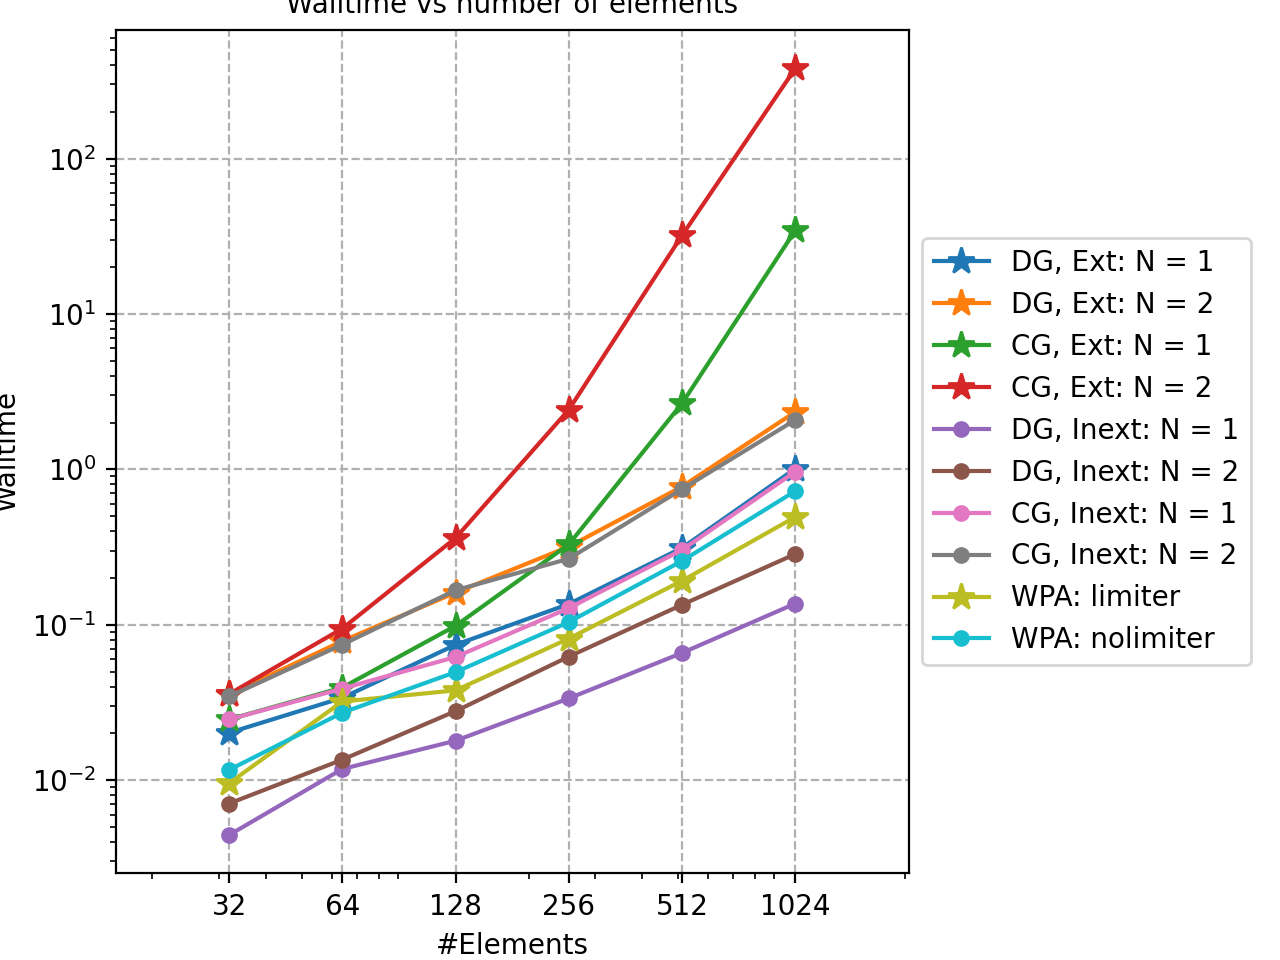

In [8]:
wall_dg_ex1 = df.loc[idx['advection','DG','exact',1,:],'walltime']
wall_dg_in1 = df.loc[idx['advection','DG','inexact',1,:],'walltime']
wall_cg_ex1 = df.loc[idx['advection','CG','exact',1,:],'walltime']
wall_cg_in1 = df.loc[idx['advection','CG','inexact',1,:],'walltime']

wall_dg_ex2 = df.loc[idx['advection','DG','exact',2,:],'walltime']
wall_dg_in2 = df.loc[idx['advection','DG','inexact',2,:],'walltime']
wall_cg_ex2 = df.loc[idx['advection','CG','exact',2,:],'walltime']
wall_cg_in2 = df.loc[idx['advection','CG','inexact',2,:],'walltime']

wall_wpa_lim = df.loc[idx['advection','WPA','w/lim',1,:],'walltime']
wall_wpa_nolim = df.loc[idx['advection','WPA','wout/lim',1,:],'walltime']

figure(1)

loglog(elements, wall_dg_ex1,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(1))
loglog(elements, wall_dg_ex2,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(2))
loglog(elements, wall_cg_ex1,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(1))
loglog(elements, wall_cg_ex2,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(2))

loglog(elements, wall_dg_in1,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(1))
loglog(elements, wall_dg_in2,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(2))
loglog(elements, wall_cg_in1,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(1))
loglog(elements, wall_cg_in2,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(2))

loglog(elements, wall_wpa_lim,'*-', markersize=10, label = 'WPA: limiter')
loglog(elements, wall_wpa_nolim,'.-', markersize=10, label = 'WPA: nolimiter')

legend(bbox_to_anchor=(1, 0.5), loc='center left')
tight_layout()

cg_graphics.set_xticks(elements)
xlabel('#Elements', fontsize=10)
ylabel('Walltime', fontsize=10)
title("Walltime vs number of elements", fontsize=10)
grid(axis='both',linestyle='--')
show()

<IPython.core.display.Javascript object>


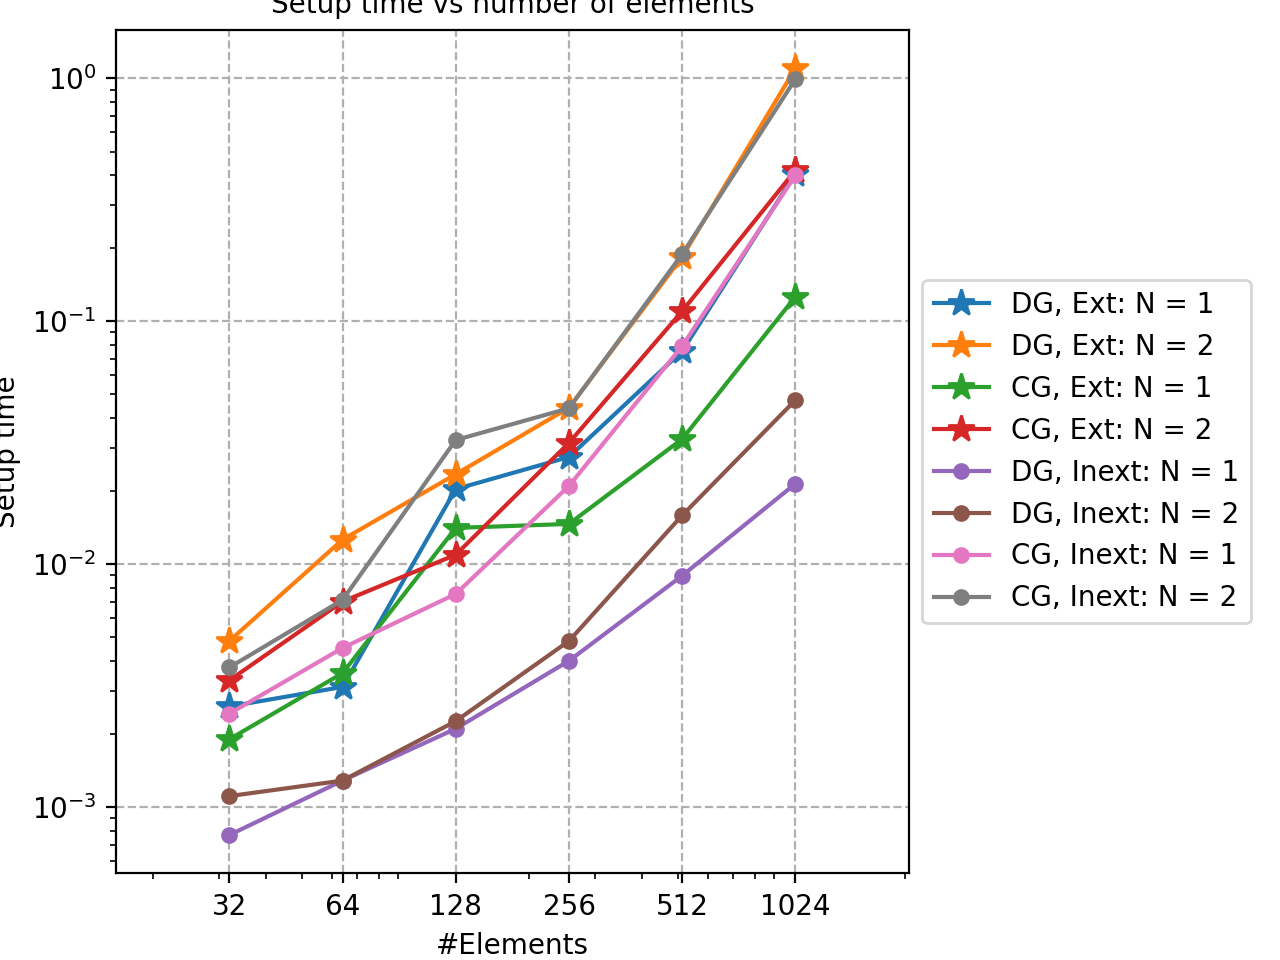

In [9]:
setup_dg_ex1 = df.loc[idx['advection','DG','exact',1,:],'Prep']
setup_dg_in1 = df.loc[idx['advection','DG','inexact',1,:],'Prep']
setup_cg_ex1 = df.loc[idx['advection','CG','exact',1,:],'Prep']
setup_cg_in1 = df.loc[idx['advection','CG','inexact',1,:],'Prep']

setup_dg_ex2 = df.loc[idx['advection','DG','exact',2,:],'Prep']
setup_dg_in2 = df.loc[idx['advection','DG','inexact',2,:],'Prep']
setup_cg_ex2 = df.loc[idx['advection','CG','exact',2,:],'Prep']
setup_cg_in2 = df.loc[idx['advection','CG','inexact',2,:],'Prep']

#wall_wpa_lim = df.loc[idx['advection','WPA','w/lim',1,:],'walltime']
#wall_wpa_nolim = df.loc[idx['advection','WPA','wout/lim',1,:],'walltime']

figure(2)

loglog(elements, setup_dg_ex1,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(1))
loglog(elements, setup_dg_ex2,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(2))
loglog(elements, setup_cg_ex1,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(1))
loglog(elements, setup_cg_ex2,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(2))

loglog(elements, setup_dg_in1,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(1))
loglog(elements, setup_dg_in2,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(2))
loglog(elements, setup_cg_in1,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(1))
loglog(elements, setup_cg_in2,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(2))

#semilogy(elements, wall_wpa_lim,'*-', markersize=10, label = 'WPA: limiter')
#semilogy(elements, wall_wpa_nolim,'.-', markersize=10, label = 'WPA: nolimiter')

legend(bbox_to_anchor=(1, 0.5), loc='center left')
tight_layout()

cg_graphics.set_xticks(elements)
xlabel('#Elements', fontsize=10)
ylabel('Setup time', fontsize=10)
title("Setup time vs number of elements", fontsize=10)
grid(axis='both',linestyle='--')
show()

<IPython.core.display.Javascript object>


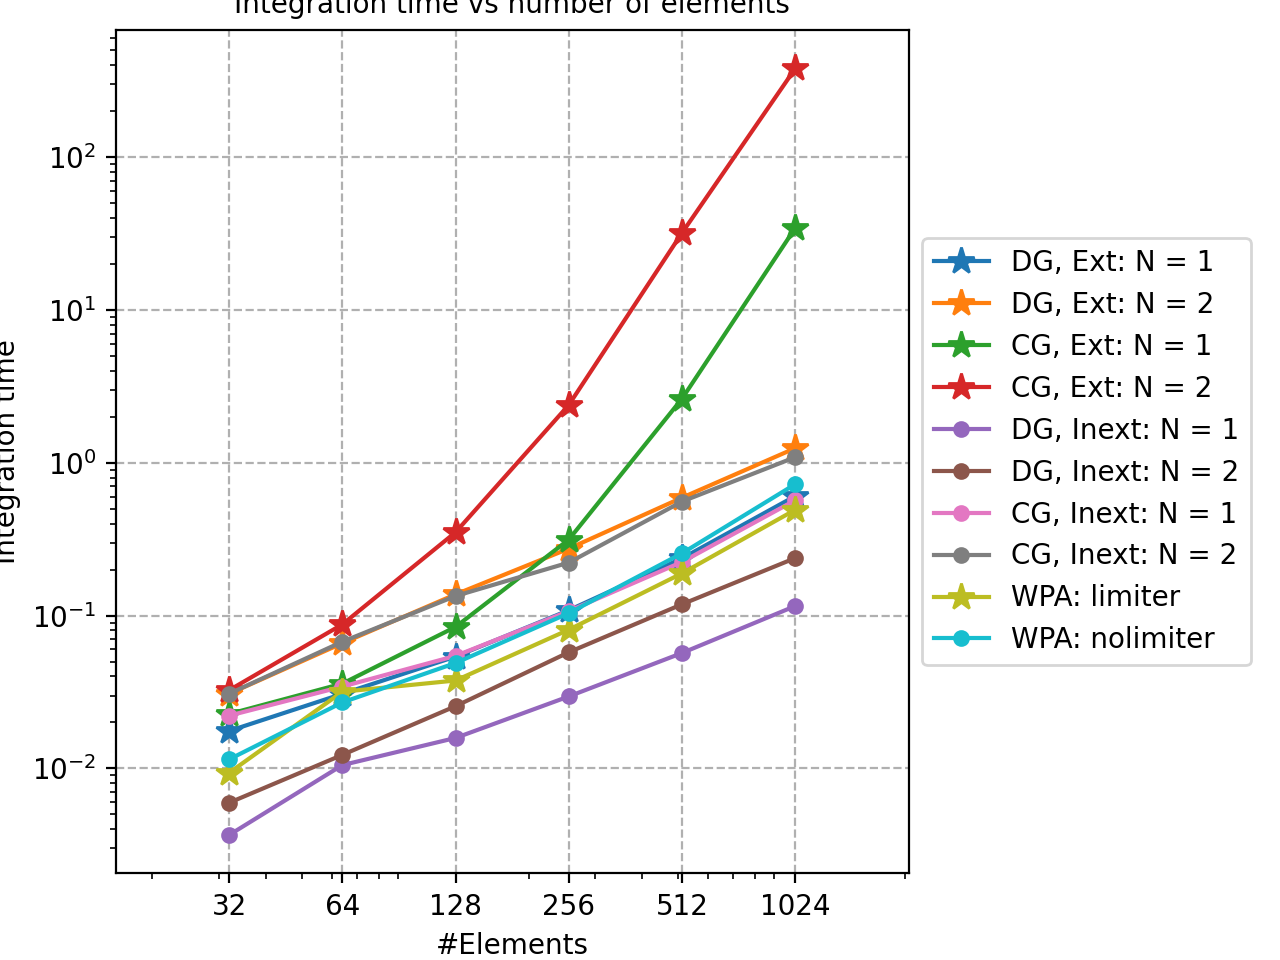

In [10]:
integ_dg_ex1 = df.loc[idx['advection','DG','exact',1,:],'Integ']
integ_dg_in1 = df.loc[idx['advection','DG','inexact',1,:],'Integ']
integ_cg_ex1 = df.loc[idx['advection','CG','exact',1,:],'Integ']
integ_cg_in1 = df.loc[idx['advection','CG','inexact',1,:],'Integ']

integ_dg_ex2 = df.loc[idx['advection','DG','exact',2,:],'Integ']
integ_dg_in2 = df.loc[idx['advection','DG','inexact',2,:],'Integ']
integ_cg_ex2 = df.loc[idx['advection','CG','exact',2,:],'Integ']
integ_cg_in2 = df.loc[idx['advection','CG','inexact',2,:],'Integ']

integ_wpa_lim = df.loc[idx['advection','WPA','w/lim',1,:],'Integ']
integ_wpa_nolim = df.loc[idx['advection','WPA','wout/lim',1,:],'Integ']

figure(3)

loglog(elements, integ_dg_ex1,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(1))
loglog(elements, integ_dg_ex2,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(2))
loglog(elements, integ_cg_ex1,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(1))
loglog(elements, integ_cg_ex2,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(2))

loglog(elements, integ_dg_in1,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(1))
loglog(elements, integ_dg_in2,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(2))
loglog(elements, integ_cg_in1,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(1))
loglog(elements, integ_cg_in2,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(2))

loglog(elements, integ_wpa_lim,'*-', markersize=10, label = 'WPA: limiter')
loglog(elements, integ_wpa_nolim,'.-', markersize=10, label = 'WPA: nolimiter')

legend(bbox_to_anchor=(1, 0.5), loc='center left')
tight_layout()

cg_graphics.set_xticks(elements)
xlabel('#Elements', fontsize=10)
ylabel('Integration time', fontsize=10)
title("Integration time vs number of elements", fontsize=10)
grid(axis='both',linestyle='--')
show()

<IPython.core.display.Javascript object>


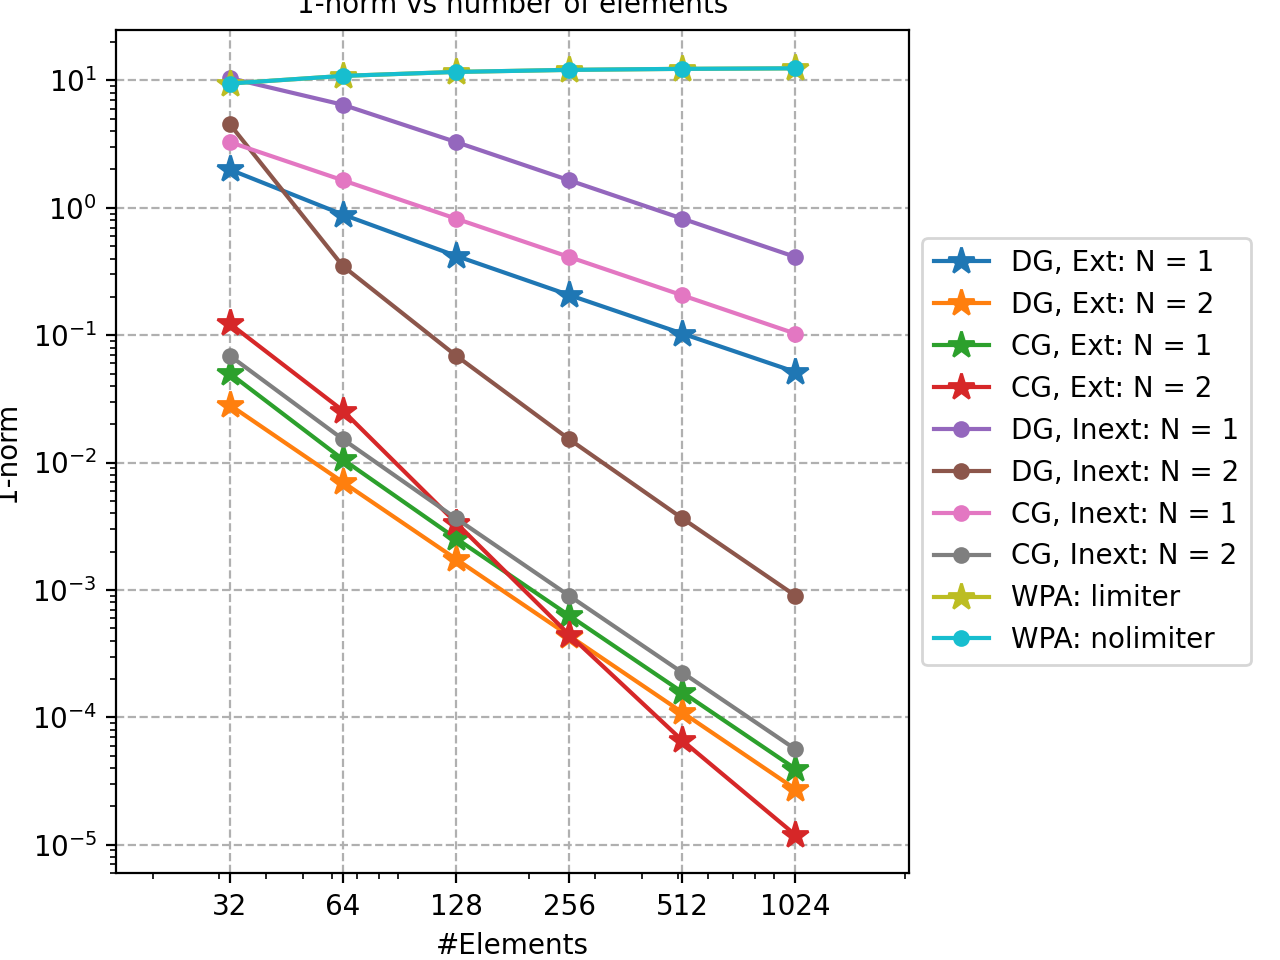

In [11]:
l1_dg_ex1 = df.loc[idx['advection','DG','exact',1,:],'1-norm']
l1_dg_in1 = df.loc[idx['advection','DG','inexact',1,:],'1-norm']
l1_cg_ex1 = df.loc[idx['advection','CG','exact',1,:],'1-norm']
l1_cg_in1 = df.loc[idx['advection','CG','inexact',1,:],'1-norm']

l1_dg_ex2 = df.loc[idx['advection','DG','exact',2,:],'1-norm']
l1_dg_in2 = df.loc[idx['advection','DG','inexact',2,:],'1-norm']
l1_cg_ex2 = df.loc[idx['advection','CG','exact',2,:],'1-norm']
l1_cg_in2 = df.loc[idx['advection','CG','inexact',2,:],'1-norm']

l1_wpa_lim = df.loc[idx['advection','WPA','w/lim',1,:],'1-norm']
l1_wpa_nolim = df.loc[idx['advection','WPA','wout/lim',1,:],'1-norm']

figure(4)

loglog(elements, l1_dg_ex1,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(1))
loglog(elements, l1_dg_ex2,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(2))
loglog(elements, l1_cg_ex1,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(1))
loglog(elements, l1_cg_ex2,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(2))

loglog(elements, l1_dg_in1,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(1))
loglog(elements, l1_dg_in2,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(2))
loglog(elements, l1_cg_in1,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(1))
loglog(elements, l1_cg_in2,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(2))

loglog(elements, l1_wpa_lim,'*-', markersize=10, label = 'WPA: limiter')
loglog(elements, l1_wpa_nolim,'.-', markersize=10, label = 'WPA: nolimiter')

legend(bbox_to_anchor=(1, 0.5), loc='center left')
tight_layout()

cg_graphics.set_xticks(elements)
xlabel('#Elements', fontsize=10)
ylabel('1-norm', fontsize=10)
title("1-norm vs number of elements", fontsize=10)
grid(axis='both',linestyle='--')
show()

<IPython.core.display.Javascript object>


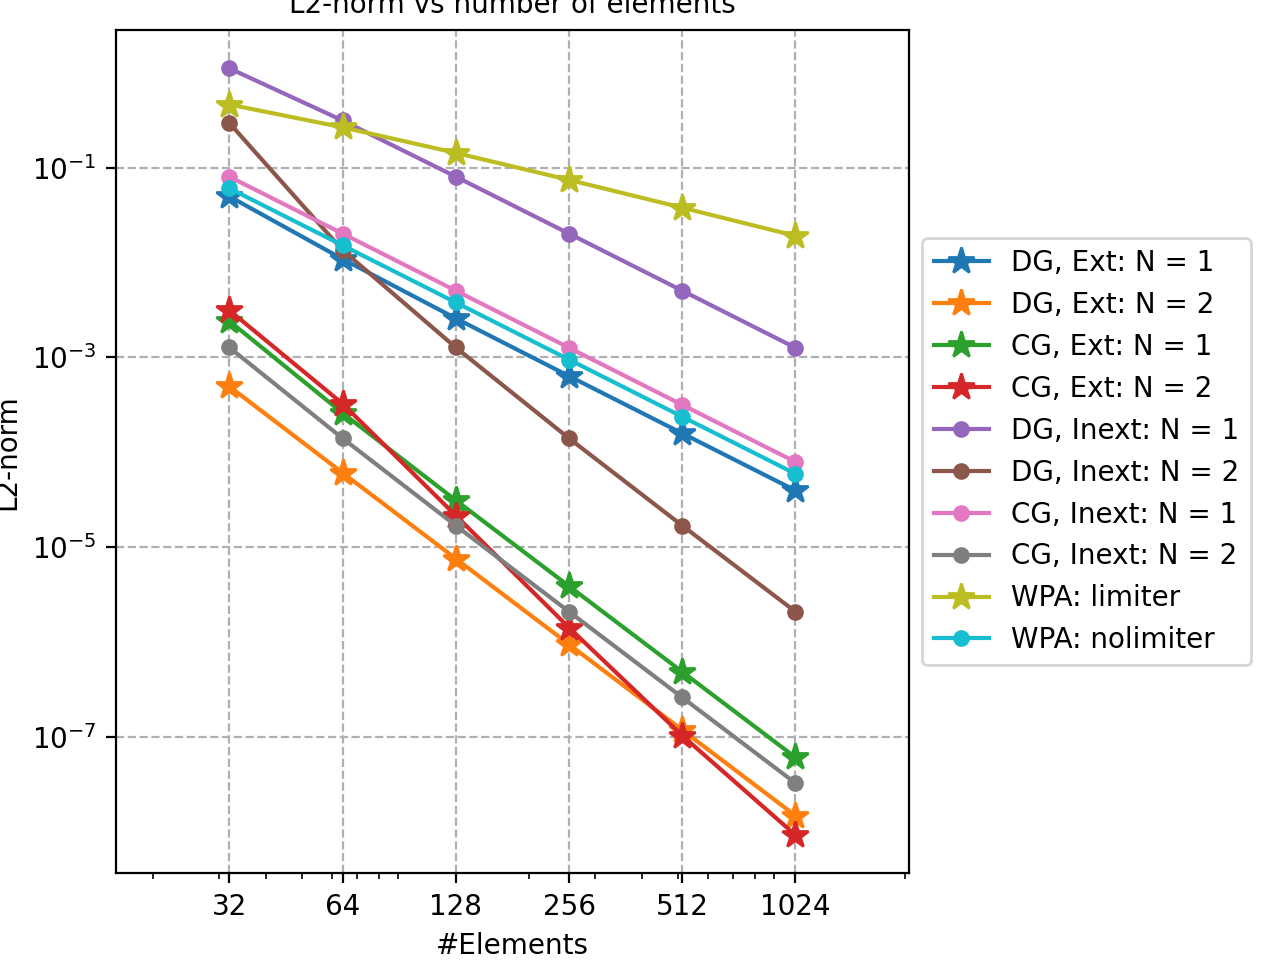

In [12]:
l2_dg_ex1 = df.loc[idx['advection','DG','exact',1,:],'2-norm']
l2_dg_in1 = df.loc[idx['advection','DG','inexact',1,:],'2-norm']
l2_cg_ex1 = df.loc[idx['advection','CG','exact',1,:],'2-norm']
l2_cg_in1 = df.loc[idx['advection','CG','inexact',1,:],'2-norm']

l2_dg_ex2 = df.loc[idx['advection','DG','exact',2,:],'2-norm']
l2_dg_in2 = df.loc[idx['advection','DG','inexact',2,:],'2-norm']
l2_cg_ex2 = df.loc[idx['advection','CG','exact',2,:],'2-norm']
l2_cg_in2 = df.loc[idx['advection','CG','inexact',2,:],'2-norm']

l2_wpa_lim = df.loc[idx['advection','WPA','w/lim',1,:],'2-norm']
l2_wpa_nolim = df.loc[idx['advection','WPA','wout/lim',1,:],'2-norm']

figure(5)

loglog(elements, l2_dg_ex1,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(1))
loglog(elements, l2_dg_ex2,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(2))
loglog(elements, l2_cg_ex1,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(1))
loglog(elements, l2_cg_ex2,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(2))

loglog(elements, l2_dg_in1,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(1))
loglog(elements, l2_dg_in2,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(2))
loglog(elements, l2_cg_in1,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(1))
loglog(elements, l2_cg_in2,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(2))

loglog(elements, l2_wpa_lim,'*-', markersize=10, label = 'WPA: limiter')
loglog(elements, l2_wpa_nolim,'.-', markersize=10, label = 'WPA: nolimiter')

legend(bbox_to_anchor=(1, 0.5), loc='center left')
tight_layout()

cg_graphics.set_xticks(elements)
xlabel('#Elements', fontsize=10)
ylabel('L2-norm', fontsize=10)
title("L2-norm vs number of elements", fontsize=10)
grid(axis='both',linestyle='--')
show()

<IPython.core.display.Javascript object>


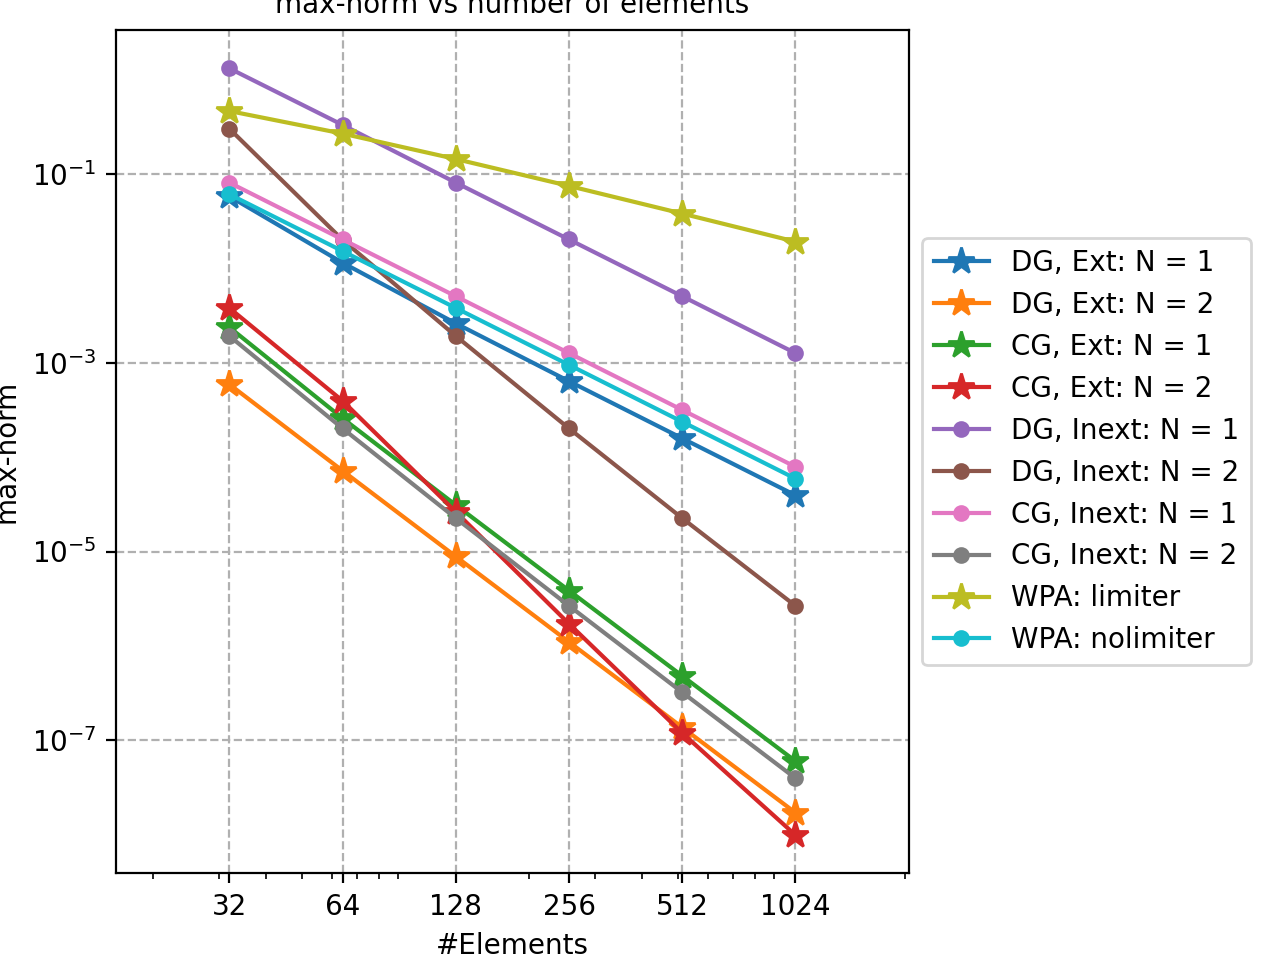

In [13]:
max_dg_ex1 = df.loc[idx['advection','DG','exact',1,:],'inf-norm']
max_dg_in1 = df.loc[idx['advection','DG','inexact',1,:],'inf-norm']
max_cg_ex1 = df.loc[idx['advection','CG','exact',1,:],'inf-norm']
max_cg_in1 = df.loc[idx['advection','CG','inexact',1,:],'inf-norm']

max_dg_ex2 = df.loc[idx['advection','DG','exact',2,:],'inf-norm']
max_dg_in2 = df.loc[idx['advection','DG','inexact',2,:],'inf-norm']
max_cg_ex2 = df.loc[idx['advection','CG','exact',2,:],'inf-norm']
max_cg_in2 = df.loc[idx['advection','CG','inexact',2,:],'inf-norm']

max_wpa_lim = df.loc[idx['advection','WPA','w/lim',1,:],'inf-norm']
max_wpa_nolim = df.loc[idx['advection','WPA','wout/lim',1,:],'inf-norm']

figure(6)

loglog(elements, max_dg_ex1,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(1))
loglog(elements, max_dg_ex2,'*-', markersize=10, label = 'DG, Ext: N = {:d}'.format(2))
loglog(elements, max_cg_ex1,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(1))
loglog(elements, max_cg_ex2,'*-', markersize=10, label = 'CG, Ext: N = {:d}'.format(2))

loglog(elements, max_dg_in1,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(1))
loglog(elements, max_dg_in2,'.-', markersize=10, label = 'DG, Inext: N = {:d}'.format(2))
loglog(elements, max_cg_in1,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(1))
loglog(elements, max_cg_in2,'.-', markersize=10, label = 'CG, Inext: N = {:d}'.format(2))

loglog(elements, max_wpa_lim,'*-', markersize=10, label = 'WPA: limiter')
loglog(elements, max_wpa_nolim,'.-', markersize=10, label = 'WPA: nolimiter')

legend(bbox_to_anchor=(1, 0.5), loc='center left')
tight_layout()

cg_graphics.set_xticks(elements)
xlabel('#Elements', fontsize=10)
ylabel('max-norm', fontsize=10)
title("max-norm vs number of elements", fontsize=10)
grid(axis='both',linestyle='--')
show()